<a href="https://colab.research.google.com/github/superizqi/BelajarBootstrap/blob/master/2_Data_Transformation_(Include_Data_Binning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

from sklearn import preprocessing

#Uploading file
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import files
uploaded = files.upload()

In [0]:
# Baca File 
namafile = '[Hasil Integration] Ads_Performance_Instan Noodle_Food (All).xlsx'
datall = pd.read_excel(namafile)
datall = datall.drop(['Unnamed: 0','No'],axis=1)
#Lihat data
datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR
0,2019-01-10 00:00:00,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70
1,2019-01-10 00:00:00,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70
2,2019-01-10 00:00:00,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70
3,2019-01-10 00:00:00,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15
4,2019-01-10 00:00:00,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40


In [0]:
# Hapus 00:00:00 pada date
hapus_nol = []
for d in datall['Date']:
  hapus_nol.append(str(d)[:10])

datall['Date'] = hapus_nol

datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR
0,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70
1,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70
2,2019-01-10,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70
3,2019-01-10,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15
4,2019-01-10,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40


In [0]:
#@title Default title text
#Mengubah dan menyelaraskan format Date menjadi Day
import datetime 
import calendar 
day_name = []

def findDay(date): 
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday() 
    return (calendar.day_name[born]) 

for i in datall['Date']:
  if  "/" in i:
    date_split = i.split('/')
    date = str(date_split[0])
    month = str(date_split[1])
    year = str(date_split[2])
    hasilsplit = year+'-'+month+'-'+date
    hasilconvert =  calendar.day_name[datetime.datetime.strptime(hasilsplit, '%Y-%m-%d').weekday()]
    day_name.append(str(hasilconvert))
  else:
    hasilconvert =  calendar.day_name[datetime.datetime.strptime(i, '%Y-%m-%d').weekday()]
    day_name.append(str(hasilconvert))

datall['Date (Day)'] = day_name
datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR,Date (Day)
0,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70,Thursday
1,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70,Thursday
2,2019-01-10,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70,Thursday
3,2019-01-10,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15,Thursday
4,2019-01-10,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40,Thursday


In [0]:
# Tambah kolom Start Time (hour) 
start_time_hour = []

for d in datall['Start Time']:
  start_time_hour.append(str(d)[:2])

datall['Start Time (hour)'] = start_time_hour
datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR,Date (Day),Start Time (hour)
0,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70,Thursday,13
1,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70,Thursday,13
2,2019-01-10,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70,Thursday,18
3,2019-01-10,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15,Thursday,20
4,2019-01-10,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40,Thursday,15


In [0]:
# Tambah kolom Duration (second) 
duration_second = []

for d in datall['Duration']:
  duration_split = d.split(':')
  total_duration_second = (int(duration_split[1])*60) + int(duration_split[2])
  duration_second.append (total_duration_second)

datall['Duration (second)'] = duration_second
datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70,Thursday,13,11
1,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70,Thursday,13,8
2,2019-01-10,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70,Thursday,18,24
3,2019-01-10,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15,Thursday,20,150
4,2019-01-10,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40,Thursday,15,15


In [0]:
# Tambah TVR 1 Digit di belakang coma
tvr_one_digit = []

for d in datall['TVR']:
  tvr_one_digit.append(int(round(d)))
  
datall['TVR (One digit)'] = tvr_one_digit
datall.head()

,Date,Channel,Program,Product,Ads Type,Start Time,Duration,Cost,TVR,Date (Day),Start Time (hour),Duration (second),TVR (One digit)
0,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,13:12:48,00:00:11,36000.0,1.70,Thursday,13,11,2
1,2019-01-10,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,13:12:49,00:00:08,25159.0,1.70,Thursday,13,8,2
2,2019-01-10,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,18:38:41,00:00:24,63000.0,1.70,Thursday,18,24,2
3,2019-01-10,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,20:14:43,00:02:30,325000.0,1.15,Thursday,20,150,1
4,2019-01-10,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,15:14:21,00:00:15,48000.0,1.40,Thursday,15,15,1


In [0]:
# Cek dan hapus

if  'Date' in datall.columns:
  datall = datall.drop('Date',1)
  # datall = datall.rename(columns={'Date (Day)': 'Date'})

if 'Start Time' in datall.columns:
  datall = datall.drop('Start Time',1)
  # datall = datall.rename(columns={'Start Time (hour)': 'Start Time'})

if 'Duration' in datall.columns:
  datall = datall.drop('Duration',1)
  # datall = datall.rename(columns={'Duration (second)': 'Duration'})

# if 'TVR' in datall.columns:
#   datall = datall.drop('TVR',1)
#   # datall = datall.rename(columns={'TVR (One digit)': 'TVR'})

datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second),TVR (One digit)
0,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,36000.0,1.70,Thursday,13,11,2
1,ANTV,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,25159.0,1.70,Thursday,13,8,2
2,MNCTV,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,63000.0,1.70,Thursday,18,24,2
3,MNCTV,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,325000.0,1.15,Thursday,20,150,1
4,RCTI,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,48000.0,1.40,Thursday,15,15,1


In [0]:
# Cek Jumlah Data
datall.shape

(22218, 10)

In [0]:
# Cek Data Kolom
print(datall.columns)

for i in datall.columns:
  print("Total " + str(i) + " = " + str(datall[i].unique().size))

Index(['Channel', 'Program', 'Product', 'Ads Type', 'Cost', 'TVR',
       'Date (Day)', 'Start Time (hour)', 'Duration (second)',
       'TVR (One digit)'],
      dtype='object')
Total Channel = 9
Total Program = 193
Total Product = 19
Total Ads Type = 19
Total Cost = 254
Total TVR = 152
Total Date (Day) = 7
Total Start Time (hour) = 21
Total Duration (second) = 154
Total TVR (One digit) = 13


In [0]:
# Cek Data Channel
print(datall['Channel'].unique())
print("Total Channel : " + str(datall['Channel'].unique().size))

['ANTV' 'MNCTV' 'RCTI' 'SCTV' 'TVONE' 'IVM' 'METRO' 'NET' 'GTV']
Total Channel : 9


In [0]:
# Cek Data Program
# print(datall['Program'].unique())
print("Total Program : " + str(datall['Program'].unique().size))

Total Program : 193


In [0]:
# Cek Data Product
# print(datall['Product'].unique())
print("Total Product : " + str(datall['Product'].unique().size))

Total Product : 19


In [0]:
# Cek Data Ads Type
print(datall['Ads Type'].unique())
print("Total Ads Type : " + str(datall['Ads Type'].unique().size))

['TEMPLATE' 'VIRTUAL ADS' 'SQUEEZE FRAME' 'BUILT IN SEGMEN' 'SUPER IMPOSE'
 'PLASMA' 'OBB' 'CBB' 'TVC BETWEEN PROGRAM' 'ADLIBS' 'MOVING IMPOSE'
 'CREDIT TITLE' 'BUILT IN' 'VIRTUAL FREEZE' 'ANIMATED LOGO' 'FULL FRAME'
 'KUIS' 'DIGITAL MOBILE' 'VERTICAL LOWER THIRD']
Total Ads Type : 19


In [0]:
# Cek Data Cost
# print(datall['Cost'].unique())
print("Total Cost : " + str(datall['Cost'].unique().size))

Total Cost : 254


In [0]:
# Cek Data Date (Day)
print(datall['Date (Day)'].unique())
print("Total Date (Day) : " + str(datall['Date (Day)'].unique().size))

['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Saturday' 'Tuesday' 'Monday']
Total Date (Day) : 7


In [0]:
# Cek Data Start Time (hour)
print(datall['Start Time (hour)'].unique())
print("Total Start Time (hour) : " + str(datall['Start Time (hour)'].unique().size))

['13' '18' '20' '15' '19' '10' '21' '06' '07' '08' '09' '12' '11' '17'
 '16' '14' '05' '22' '23' '04' '02']
Total Start Time (hour) : 21


In [0]:
# Cek Duration (second)
print(datall['Duration (second)'].unique())
print("Total Duration (second) : " + str(datall['Duration (second)'].unique().size))

# # Kalo yang kurang dari 1 menit
# duration_max_sixty = []
# for i in datall['Duration (second)'].unique():
#   if int(i) <= 60:
#     duration_max_sixty.append(i)

# print(duration_max_sixty)
# print("Total Duration (second) : " + str(len(duration_max_sixty)))

[  11    8   24  150   15   14    9   12  110   13    3    5   10    4
    6    2  157    7   26    1   16  141  140  135   18   17  146  153
   22  314   25  126   19  109   44  129   23  154  145   20  156   29
  151  124   21  165  261   27  148  180  136  171   64  139  344  134
  158  223  147  128  125  201   45  123   30  149  142  113   72  191
   46  120  143 1811  230  131  130   37   35   78   68  186  137   60
  195   52  155  138   32  163  187  233  231  127  111  172  173  185
   50  179  118   53   28  208  669  159   71   73   67  182   36  133
  178  183   63   85   98   58  193   84  166  242  132   75  241  192
   79  184  164   34  161   70  249   81   38  114   82  175  234  190
   80   41   55  160   91  121   77  122   96  100   62  243   69   43]
Total Duration (second) : 154


In [0]:
# Cek TVR (One digit) -> pake data discret
print(datall['TVR (One digit)'].unique())
print("Total TVR (One digit) : " + str(datall['TVR (One digit)'].unique().size))

[ 2  1  4  3  0  5  6  7  8  9 10 12 11]
Total TVR (One digit) : 13


In [0]:
# Inisialisasi Index Channel 

daftar_channel = []

for d in datall['Channel'].unique():
  daftar_channel.append(d)

# print(daftar_channel)

In [0]:
# Konversi Indeks Channel
daftar_channel = []

for d in datall['Channel'].unique():
  daftar_channel.append(d)
  
channel_index = []

if  str(datall['Channel'][0]).isdigit() == False:
  for d in datall['Channel']:
    chindex = daftar_channel.index(d)
    channel_index.append(chindex)

  datall['Channel'] = channel_index
  
datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,0,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,TEMPLATE,36000.0,1.70,Thursday,13,11
1,0,ISHQ MEIN MARJAWAN,POP MIE - INSTANT NOODLE,VIRTUAL ADS,25159.0,1.70,Thursday,13,8
2,1,UPIN & IPIN BERMULA,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,63000.0,1.70,Thursday,18,24
3,1,FATIH DI KAMPUNG JAWARA 2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,325000.0,1.15,Thursday,20,150
4,2,OGAH RUGI,POP MIE - INSTANT NOODLE,VIRTUAL ADS,48000.0,1.40,Thursday,15,15


In [0]:
# print(datall.columns)
# Inisialisasi Daftar Program

# daftar_program  = []

# for d in datall['Program'].unique():
#   daftar_program.append(d)

# print(daftar_program)
# print('Total = ' + str(len(daftar_program)))

In [0]:
# Konversi Indeks Program
daftar_program  = []

for d in datall['Program'].unique():
  daftar_program.append(d)

program_index = []

if  str(datall['Program'][0]).isdigit() == False:
  for d in datall['Program']:
    index = daftar_program.index(d)
    program_index.append(index)

  datall['Program'] = program_index
  
datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,0,0,POP MIE - INSTANT NOODLE,TEMPLATE,36000.0,1.70,Thursday,13,11
1,0,0,POP MIE - INSTANT NOODLE,VIRTUAL ADS,25159.0,1.70,Thursday,13,8
2,1,1,SUPER BUBUR - INSTANT PORRIDGE,SQUEEZE FRAME,63000.0,1.70,Thursday,18,24
3,1,2,MIGELAS JUMBO - INSTANT NOODLE,BUILT IN SEGMEN,325000.0,1.15,Thursday,20,150
4,2,3,POP MIE - INSTANT NOODLE,VIRTUAL ADS,48000.0,1.40,Thursday,15,15


In [0]:
# print(datall.columns)
# Inisialisasi Daftar Product

# daftar_product  = []

# for d in datall['Product'].unique():
#   daftar_product.append(d)

# print(daftar_product)
# print('Total = ' + str(len(daftar_product)))

In [0]:
# Konversi Indeks Product
daftar_product  = []

for d in datall['Product'].unique():
  daftar_product.append(d)
  
product_index = []

if  str(datall['Product'][0]).isdigit() == False:
  for d in datall['Product']:
    index = daftar_product.index(d)
    product_index.append(index)

  datall['Product'] = product_index
  
datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,0,0,0,TEMPLATE,36000.0,1.70,Thursday,13,11
1,0,0,0,VIRTUAL ADS,25159.0,1.70,Thursday,13,8
2,1,1,1,SQUEEZE FRAME,63000.0,1.70,Thursday,18,24
3,1,2,2,BUILT IN SEGMEN,325000.0,1.15,Thursday,20,150
4,2,3,0,VIRTUAL ADS,48000.0,1.40,Thursday,15,15


In [0]:
# print(datall.columns)
# Inisialisasi Index Ads Type 

# daftar_ads_type = []

# for d in datall['Ads Type'].unique():
#   daftar_ads_type.append(d)

# print(daftar_ads_type)
# print('Total = ' + str(len(daftar_ads_type)))

In [0]:
# Konversi Indeks Ads Type
daftar_ads_type = []

for d in datall['Ads Type'].unique():
  daftar_ads_type.append(d)

ads_type_index = []

if  str(datall['Ads Type'][0]).isdigit() == False:
  for d in datall['Ads Type']:
    adsindex = daftar_ads_type.index(d) 
    ads_type_index.append(adsindex)

  datall['Ads Type'] = ads_type_index
  
datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,0,0,0,0,36000.0,1.70,Thursday,13,11
1,0,0,0,1,25159.0,1.70,Thursday,13,8
2,1,1,1,2,63000.0,1.70,Thursday,18,24
3,1,2,2,3,325000.0,1.15,Thursday,20,150
4,2,3,0,1,48000.0,1.40,Thursday,15,15


In [0]:
# # # normalisasi cost
# # from sklearn import preprocessing

# # # Set charts to view inline
# # %matplotlib inline

# # # # View the unnormalized data
# # datall['Cost'].plot(kind='bar')

# # Create x, where x the 'scores' column's values as floats
# x = datall[['Cost']].values.astype(float)

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# x_scaled = min_max_scaler.fit_transform(x)

# # Run the normalizer on the dataframe
# datall_normalized = pd.DataFrame(x_scaled)
# datall['Cost (Normalized)'] = x_scaled
# # datall.head()
# datall['Cost'].plot(kind='bar')

In [0]:
# # Import required modules
# import pandas as pd
# from sklearn import preprocessing

# # Set charts to view inline
# %matplotlib inline

# # # View the unnormalized data
# datall_normalized.plot(kind='bar')

In [0]:
# # Inisialisasi Index Date (Day)

# daftar_day = []

# for d in datall['Date (Day)'].unique():
#   daftar_day.append(d)

# print(daftar_day)
# print('Total = ' + str(len(daftar_day)))

In [0]:
# Konversi Indeks Date (Day)
daftar_day = []

for d in datall['Date (Day)'].unique():
  daftar_day.append(d)
  
date_day_index = []

if  str(datall['Date (Day)'][0]).isdigit() == False:
  for d in datall['Date (Day)']:
    ddindex = daftar_day.index(d)
    date_day_index.append(ddindex)

  datall['Date (Day)'] = date_day_index
  
datall.head()

,Channel,Program,Product,Ads Type,Cost,TVR,Date (Day),Start Time (hour),Duration (second)
0,0,0,0,0,36000.0,1.70,0,13,11
1,0,0,0,1,25159.0,1.70,0,13,8
2,1,1,1,2,63000.0,1.70,0,18,24
3,1,2,2,3,325000.0,1.15,0,20,150
4,2,3,0,1,48000.0,1.40,0,15,15


In [0]:
def databinning(namakolom, jumlahbin):
  datanya = []

  for d in datall[namakolom]:
      datanya.append(d)
      # arr_tvr.append(int(round(d)))

  print(len(datanya))

  datanya = np.sort(datanya)
  # datanya = datanya.sort()
  print(datanya)
  de = 0

  for i in range(0,len(datanya),int(len(datanya)/jumlahbin)):
    mean = 0  
    for j in range (0,int(len(datanya)/jumlahbin),1) :
      mean = mean + datanya[i+j]
    de = de + 1
    print("Bin " + str(de) + " Batas bawah " + str(i) + " Batas atas " + str(i+(datanya.size/jumlahbin)) + " Mean " + str(mean/((datanya.size/jumlahbin))))

databinning('Cost',14)

22218
[1.0e-01 1.0e-01 1.0e-01 ... 2.2e+06 2.5e+06 3.0e+06]
Bin 1 Batas bawah 0 Batas atas 1587.0 Mean 8954.270346565829
Bin 2 Batas bawah 1587 Batas atas 3174.0 Mean 15402.42255828607
Bin 3 Batas bawah 3174 Batas atas 4761.0 Mean 18263.279647133102
Bin 4 Batas bawah 4761 Batas atas 6348.0 Mean 20518.32948960301
Bin 5 Batas bawah 6348 Batas atas 7935.0 Mean 26037.74171392565
Bin 6 Batas bawah 7935 Batas atas 9522.0 Mean 27039.392249527406
Bin 7 Batas bawah 9522 Batas atas 11109.0 Mean 31289.073913043372
Bin 8 Batas bawah 11109 Batas atas 12696.0 Mean 36038.48040327654
Bin 9 Batas bawah 12696 Batas atas 14283.0 Mean 40403.06049149341
Bin 10 Batas bawah 14283 Batas atas 15870.0 Mean 43853.2677378703
Bin 11 Batas bawah 15870 Batas atas 17457.0 Mean 49073.26074354124
Bin 12 Batas bawah 17457 Batas atas 19044.0 Mean 58219.62507876496
Bin 13 Batas bawah 19044 Batas atas 20631.0 Mean 61025.36345305607
Bin 14 Batas bawah 20631 Batas atas 22218.0 Mean 137377.802268431


In [0]:
print(max(datall['Cost']))

3000000.0


In [0]:
# print(arr_tvr[22000])
# # print(arr_tvr.index(11.9))
# print(np.amax(arr_tvr))
# print(arr_tvr[14068])
# # print(arr_tvr.index(10.1))

# newmean = 0
# for c in range(14811,18515):
#     newmean = newmean + arr_tvr[c]

# print(newmean/(len(arr_tvr)/3))

In [0]:
arr_cost = []

for d in datall['Cost']:
    arr_cost.append(d)

databinning(arr_cost,6)
print(max(arr_cost))

NameError: ignored

In [0]:
def hitungcoba(angka, angka2):
  datadata = 0
  datadata2 = 0
  for d in datall['TVR (One digit)']:
    # datadata = datadata + 1    
    # datadata = datadata + d
    if int(d) < angka :
      datadata = datadata + 1    
    if int(d) < angka2 :
      datadata2 = datadata2 + 1    
  print("Data lebih dari " + str(angka) + " kurang dari " + str(angka2) + " adalah " + str(datadata2-datadata))

# def hitungcobaa(angka, angka2):
#   datadata = 0
#   for d in datall['TVR (One digit)']:
#     if d > angka and d < angka2 :
#       datadata = datadata + 1    
#   # print("Data lebih dari " + str(angka) + " kurang dari " + str(angka2) + " adalah " + str(datadata))
#   return datadata

# def kurangdarinol(angka):
#   datadata = 0
#   for d in datall['TVR (One digit)']:
#     if d < angka:
#       datadata = datadata + 1    
#   print("Data  kurang dari " + str(angka) + " adalah " + str(datadata))
  

# total = 0
# # kurangdarinol(0)
# for i in range(0,13,1):
#   # hitungcoba(i,i+1)
#   total = total + hitungcobaa(i,i+1)
# print(total)

# print(len(datall['TVR']))


In [0]:
datall['TVR (One digit)'].value_counts(normalize=True)

2     0.351922
1     0.275767
3     0.133225
0     0.128184
4     0.083536
5     0.019804
6     0.005986
7     0.000630
10    0.000315
11    0.000225
9     0.000225
12    0.000135
8     0.000045
Name: TVR (One digit), dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc2af219e8>]],
      dtype=object)

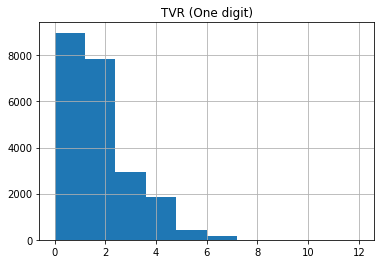

In [0]:
datall.hist(column="TVR (One digit)")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc2988bdd8>]],
      dtype=object)

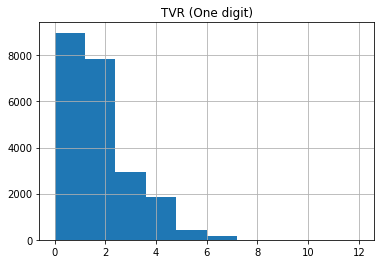

In [0]:
datall.hist(column="TVR (One digit)",bins=10)

In [0]:
print(datall['TVR (One digit)'].unique())
print("Total TVR : " + str(datall['TVR'].unique().size))

[ 2  1  4  3  0  5  6  7  8  9 10 12 11]
Total TVR : 152


In [0]:
print("Total TVR : " + str(datall['Cost'].unique().size))

Total TVR : 254


In [0]:
# # normalisasi duration

# # Create x, where x the 'scores' column's values as floats
# x_duration = datall[['Duration (second)']].values.astype(float)

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# duration_scaled = min_max_scaler.fit_transform(x_duration)

# # Run the normalizer on the dataframe
# datall['Duration (Normalized)'] = duration_scaled
# datall.head()

In [0]:
# # buat tvr
# # normalisasi tvr

# # Create x, where x the 'scores' column's values as floats
# x_tvr = datall[['TVR (One digit)']].values.astype(float)

# # Create a minimum and maximum processor object
# min_max_scaler = preprocessing.MinMaxScaler()

# # Create an object to transform the data to fit minmax processor
# tvr_scaled = min_max_scaler.fit_transform(x_tvr)

# # Run the normalizer on the dataframe
# datall['TVR (Normalized)'] = tvr_scaled
# datall.head()

In [0]:
# # Hapus data yang belum di normalisasi

# if  'Cost' in datall.columns:
#   datall = datall.drop('Cost',1)
#   # datall = datall.rename(columns={'Date (Day)': 'Date'})

# if  'Duration (second)' in datall.columns:
#   datall = datall.drop('Duration (second)',1)
#   # datall = datall.rename(columns={'Date (Day)': 'Date'})

# if  'TVR (One digit)' in datall.columns:
#   datall = datall.drop('TVR (One digit)',1)
#   # datall = datall.rename(columns={'Date (Day)': 'Date'})

# datall.head()

In [0]:
# from collections import Counter
# from scipy.stats import entropy
# import math


# def info_gain(Ex, a, nan=True):
#     """ Compute the information gain of an attribute a for given examples.
#         Parameters
#         ----------
#         Ex : list of hashable
#             A list of hashable objects (examples)
#             corresponding to the given attributes a.
#             I.e. a[i] <--> Ex[i].
#         a : list of hashable
#             A list of hashable objects (attributes)
#             corresponding to the given examples Ex.
#             I.e. a[i] <--> Ex[i].
            
#         nan : boolean, default=True
#             Boolean indicating how nan==nan should be evaluated.
#             Default == True to avoid division by 0 errors.
#         Returns
#         -------
#         result : float
#             Information gain by knowing given attributes.
#         """
#     # Check whether examples and attributes have the same lengths.
#     if len(Ex) != len(a):
#         raise ValueError("Ex and a must be of the same size.")

#     # Compute the entropy of examples
#     H_Ex = entropy(list(Counter(Ex).values()))

#     # If nan is True, replace all nan values in a by the string "__nan__"
#     if nan:
#         a = ['__nan__' if isinstance(x, float) and math.isnan(x) else x for x in a]
    
#     # Compute the sum of all values v in a
#     sum_v = 0
#     for v in set(a):
#         Ex_a_v = [x for x, t in zip(Ex, a) if t == v]
#         sum_v += (len(Ex_a_v) / len(Ex)) *\
#                  (entropy(list(Counter(Ex_a_v).values())))

#     # Return result
#     return H_Ex - sum_v
  

In [0]:
# from collections import Counter
# from scipy.stats import entropy
# import math

# def info_gain(Ex, a, nan=True):
#     # Check whether examples and attributes have the same lengths.
#     if len(Ex) != len(a):
#         raise ValueError("Ex and a must be of the same size.")

#     # Compute the entropy of examples
#     H_Ex = entropy(list(Counter(Ex).values()))

#     # If nan is True, replace all nan values in a by the string "__nan__"
#     if nan:
#         a = ['__nan__' if isinstance(x, float) and math.isnan(x) else x for x in a]
    
#     # Compute the sum of all values v in a
#     sum_v = 0
#     for v in set(a):
#         Ex_a_v = [x for x, t in zip(Ex, a) if t == v]
#         sum_v += (len(Ex_a_v) / len(Ex)) *\
#                  (entropy(list(Counter(Ex_a_v).values())))

#     # Return result
#     return H_Ex - sum_v
  

In [0]:
# print (datall.columns)
# datall.to_excel("[Hasil Transformation] Ads_Performance_Instan Noodle_Food (All).xlsx")  

Index(['Channel', 'Program', 'Product', 'Ads Type', 'Date (Day)',
       'Start Time (hour)', 'Cost (Normalized)', 'Duration (Normalized)',
       'TVR (Normalized)'],
      dtype='object')


In [0]:
# print('Nilai Information Gain dengan atribut target TVR')
# data_attribut = []
# nilai_ig = []
# for i in datall.columns:
#   ig  = info_gain(datall['TVR (Normalized)'], datall[i])
#   data_attribut.append(i)
#   nilai_ig.append(ig)

# for i in range(len(datall.columns)):
#   print(str(data_attribut[i]) + '=' + str(nilai_ig[i]))

Nilai Information Gain dengan atribut target TVR
Channel=0.3999375536141141
Program=0.8366478967179182
Product=0.17409690711959924
Ads Type=0.09175033081504247
Date (Day)=0.006803667751990705
Start Time (hour)=0.3671714506513346
Cost (Normalized)=0.6298732239452287
Duration (Normalized)=0.0457199842130096
TVR (Normalized)=1.5829433799282504


In [0]:
# print('Nilai Information Gain dengan atribut target Cost')
# data_attribut_cost = []
# nilai_ig_cost = []
# for i in datall.columns:
#   ig  = info_gain(datall['Cost (Normalized)'], datall[i])
#   data_attribut_cost.append(i)
#   nilai_ig_cost.append(ig)

# for i in range(len(datall.columns)):
#   print(str(data_attribut_cost[i]) + '=' + str(nilai_ig_cost[i]))

Nilai Information Gain dengan atribut target Cost
Channel=1.4948648944760698
Program=2.6865591955740813
Product=0.8200412243741226
Ads Type=0.7029207478208912
Date (Day)=0.13940485427711113
Start Time (hour)=1.1408563208752387
Cost (Normalized)=3.8468304489775904
Duration (Normalized)=1.2999141417457256
TVR (Normalized)=0.6298732239452289


In [0]:
# print(datall['Duration (second)'].unique())
# print(datall['Duration (second)'].unique().size)

In [0]:
# # Formating Duration jadi 1 sampai 5 menit 1 , 2 , 3 , 4, 5
# # 1 = kurang dari 1
# # 2 = kurang dari 2
# # 3 = kurang dari 3
# # 4 = kurang dari 4
# # 5 = kurang dari 5
# # 6 = lebih dari 5
# duration_one_un_five = []
# totaldatadur = datall['Duration (second)'].unique().size
# # print(totaldatadur)

# if totaldatadur == 154:
#   for d in datall['Duration (second)']:
#     if d > 0 and d <= 60:
#       duration_one_un_five.append('1')
#     elif d > 60 and d <= 120:
#       duration_one_un_five.append('2')
#     elif d > 120 and d <= 180:
#       duration_one_un_five.append('3')  
#     elif d > 180 and d <= 240:
#       duration_one_un_five.append('4')  
#     elif d > 240 and d <= 300:
#       duration_one_un_five.append('5')  
#     elif d > 300:
#       duration_one_un_five.append('6')

# if len(duration_one_un_five) > 0:
#   datall['Duration (minute)'] = duration_one_un_five
# datall.head()

In [0]:
# # Data Discret harus pake metode
# # datall['Duration (second)'].value_counts()
# datall['TVR (One digit)'].value_counts()

In [0]:
# datall['Ads Type'].value_counts()

In [0]:
# min max normalization -> data discret